# Monte Carlo integration example

Volume integration in N-D

Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt

### (1) Shape definition

In [2]:
# Defines the unit shere in arbitrary number of dimensions

def isInside(x) :
    "Sphere with unit radius and origing at (0,0,0)"
    r2 = np.sum(x*x)
    return int( r2 < 1 )

### (3) Run Monte Carlo integration of volume

In [3]:
def mcVol(Nmc,Ndim=3):

    # Integration range (common for all coordinates)

    Xmin = -1.
    Xmax = 1.

    Vtot = (Xmax-Xmin)**Ndim

    dV = Vtot/Nmc
    
    # Generate random points in space
    
    V = 0
    
    for imc in range(Nmc):
        x = np.random.uniform(Xmin,Xmax,size=Ndim)
        V+=dV*isInside(x)
    
    return V

### (4) Integration with increasing precision

In [4]:
# Test values for number of divisions

Ndim = 5

n_tab = np.array([30,100,300,1000,3000,10000,30000,100000,300000,1000000])

# Main loop

v_tab = np.empty(n_tab.size)

print("Monte Carlo integration:")

for ind in range(n_tab.size):
    n = n_tab[ind]
    v_tab[ind] = mcVol(n,Ndim)
    print(n,v_tab[ind])


Monte Carlo integration:
30 8.533333333333333
100 3.8399999999999994
300 5.333333333333328
1000 5.120000000000004
3000 5.397333333333321
10000 5.139199999999956
30000 5.185066666666408
100000 5.313600000000809
300000 5.246613333327983
1000000 5.271936000004611


In [5]:
# Expected volume

Vexp = np.pi**(Ndim/2.)/gamma(1.+Ndim/2.)

print("Expected value: ",Vexp)

Expected value:  5.263789013914324


### (4) Plot results

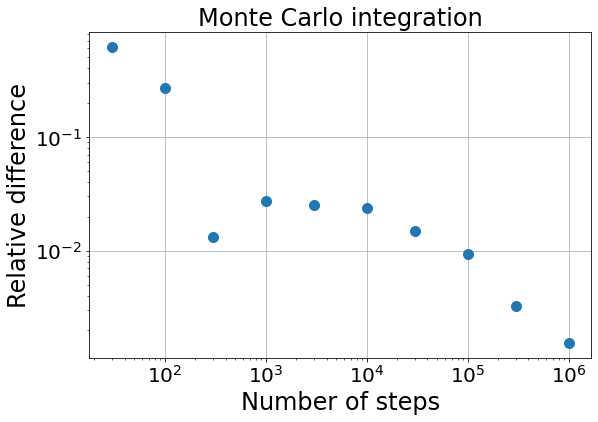

In [6]:
# Create result graph

dv_tab = np.abs(v_tab/Vexp - 1.)

plt.figure(figsize=(9, 6))

plt.loglog(n_tab,dv_tab,'o',markersize=10)

plt.title("Monte Carlo integration",size=24)
plt.xlabel('Number of steps',size=24)
plt.ylabel('Relative difference',size=24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(which='major', axis='both')

fname = '05_mc_integration_2.png'
plt.savefig(fname)

plt.show()